In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 150)
path='C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\'

In [14]:
df = pd.read_excel(path+'athina_playlist_metadata.xlsx')
df.tail()

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence
618,0.09830,commuting,40,Deep Purple,0.632,0.586,male,5SAUIWdZ04OxYfJFDchC7S,0.581000,0.0535,outdoor,-11.333,excited,midday,63.0,1972-03-25,Smoke on the Water,0.0284,114.243,9,0.890
619,0.07900,commuting,40,The Clash,0.742,0.833,male,39shmbIHICJ2Wxnk1fPSdz,0.000000,0.3840,outdoor,-6.463,excited,midday,77.0,1982,Should I Stay or Should I Go - Remastered,0.1150,113.375,9,0.816
620,0.00705,commuting,40,Motörhead,0.448,0.936,male,1s0koYJ8UkZstIYYGboZa3,0.245000,0.1280,outdoor,-6.300,excited,midday,29.0,1992-07-28,You Better Run,0.0589,135.135,9,0.536
621,0.00377,commuting,40,Motörhead,0.660,0.778,male,7BwYSuWTyfcG3vtp1SnP7n,0.000856,0.3730,outdoor,-6.163,excited,midday,45.0,1979-03-24,Louie Louie,0.0583,123.205,9,0.758
622,0.00014,commuting,40,The Gone Jackals,0.305,0.882,male,2u2hIyLXxO06AudM88TmgF,0.249000,0.3880,outdoor,-13.521,excited,midday,31.0,1995,Legacy,0.0706,125.519,9,0.477


female    314
male      309
Name: gender, dtype: int64


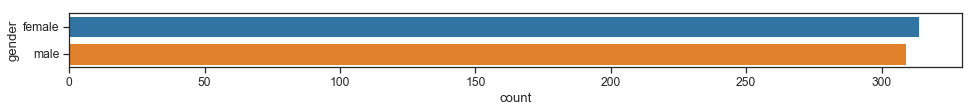

In [95]:
replace_values = {'Female': 'female'}
df = df.replace({'gender': replace_values})

print(df['gender'].value_counts())
plt.figure(figsize=(16,1))
sns.countplot(y='gender', data=df, order = df.gender.value_counts().index )

calm        162
relaxed      91
excited      77
pleased      50
sad          48
peaceful     44
happy        43
angry        33
bored        29
nervous      29
sleepy       17
Name: mood, dtype: int64


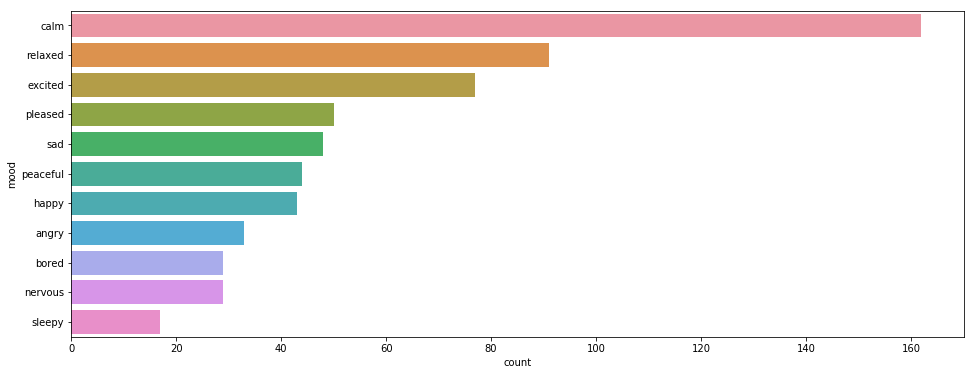

In [15]:
print(df['mood'].value_counts())
plt.figure(figsize=(16,6))
sns.countplot(y='mood', data=df, order = df.mood.value_counts().index )

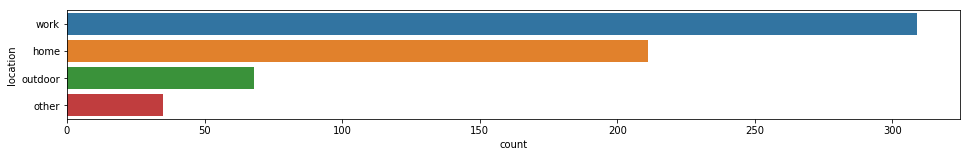

In [16]:
df['location'].value_counts()
plt.figure(figsize=(16,2))
sns.countplot(y='location', data=df, order = df.location.value_counts().index )

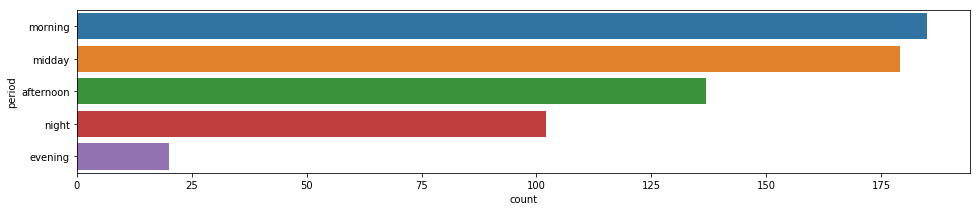

In [17]:
df['period'].value_counts()
plt.figure(figsize=(16,3))
sns.countplot(y='period', data=df, order = df.period.value_counts().index )

working        362
amusing        141
commuting       44
studying        38
working out     29
other            9
Name: activity, dtype: int64


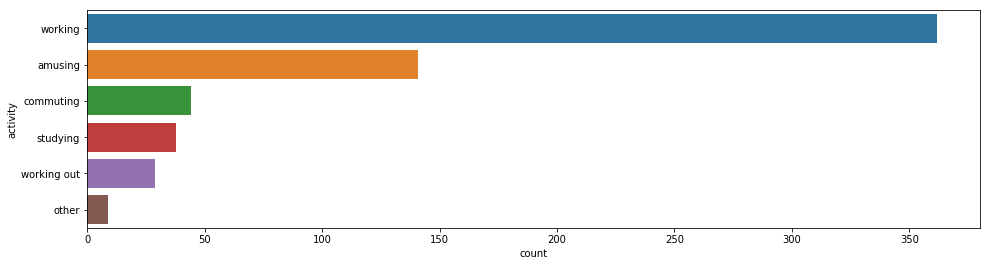

In [18]:
print(df['activity'].value_counts())
plt.figure(figsize=(16,4))
sns.countplot(y='activity', data=df, order = df.activity.value_counts().index )

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 21 columns):
acousticness        432 non-null float64
activity            623 non-null object
age                 623 non-null int64
artist_name         623 non-null object
danceability        432 non-null float64
energy              432 non-null float64
gender              623 non-null object
id                  432 non-null object
instrumentalness    432 non-null float64
liveness            432 non-null float64
location            623 non-null object
loudness            432 non-null float64
mood                623 non-null object
period              623 non-null object
popularity          432 non-null float64
release_date        432 non-null object
song_name           623 non-null object
speechiness         432 non-null float64
tempo               432 non-null float64
user_id             623 non-null int64
valence             432 non-null float64
dtypes: float64(10), int64(2), object(9)
memory

In [106]:
df_enc = df

#encode location
one_hot_enc = pd.get_dummies(df['location'])
df_enc = df_enc.drop('location', axis=1)
df_enc = df_enc.join(one_hot_enc)
#encode activity
replace_values = {'other': 'activity_other'}
df = df.replace({'activity': replace_values})
one_hot_enc = pd.get_dummies(df['activity'])
df_enc = df_enc.drop('activity', axis=1)
df_enc = df_enc.join(one_hot_enc)
#encode gender
one_hot_enc = pd.get_dummies(df['gender'])
df_enc = df_enc.drop('gender', axis=1)
df_enc = df_enc.join(one_hot_enc)
#encode period
one_hot_enc = pd.get_dummies(df['period'])
df_enc = df_enc.drop('period', axis=1) 
df_enc = df_enc.join(one_hot_enc)
#encode mood
#one_hot_enc = pd.get_dummies(df['mood'])
#df_enc = df_enc.drop('mood', axis=1) 
#df_enc = df_enc.join(one_hot_enc)

replace_values = {'pleased': 'contentment', 'relaxed': 'contentment', 'calm': 'contentment', 
                 'peaceful':'contentment', 'excited':'excitement',
                 'happy':'excitement', 'nervous':'distress', 'angry':'distress', 'annoying':'distress', 
                 'sad':'depression', 'sleepy': 'contentment', 'bored': 'depression'}
#df_enc = df_enc.replace({'mood': replace_values})

#target is the mood
#Y = df_enc['mood']

df_enc = df_enc.drop(['artist_name', 'id', 'song_name', 'release_date', 'mood'], axis = 1)
#df_enc = df_enc.drop(['artist_name', 'id', 'song_name', 'release_date'], axis = 1)


#### Drop NaN values in Spotify metadata ####

In [107]:
df_enc = df_enc.drop('user_id', axis=1)
df_enc = df_enc.dropna()
df_enc.head()

,acousticness,age,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,home,other,outdoor,work,activity_other,amusing,commuting,studying,working,working out,female,male,afternoon,evening,midday,morning,night
0,0.1430,44,0.517,0.671,0.392000,0.0974,-10.072,19.0,0.0279,188.021,0.8620,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,0.4070,44,0.544,0.463,0.000000,0.0748,-6.832,43.0,0.0294,131.842,0.2820,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
2,0.6960,44,0.553,0.528,0.001080,0.1040,-12.852,33.0,0.0306,143.937,0.0952,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0.0863,44,0.649,0.716,0.000026,0.1350,-5.371,80.0,0.0349,99.988,0.1630,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0.0275,44,0.516,0.595,0.000000,0.1090,-4.630,78.0,0.0313,119.972,0.2220,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


#### Scale data because t-SNE relies on neighborhods ####

In [43]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_enc)
d_scaled = scaler.transform(df_enc)
print(d_scaled.min(), d_scaled.max())

-4.741122768879967 8.426149773176357


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit(df_enc)
d_scaled = scaler.transform(df_enc)
print(d_scaled.min(), d_scaled.max())

-1.0 1.0000000000000004


#### Apply K-means and find optimum number of clusters using silhouette score####

In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for num_clusters in range(2,16):
    clusterer = KMeans(n_clusters=num_clusters, n_jobs=4)
    preds = clusterer.fit_predict(d_scaled)
    # centers = clusterer.cluster_centers_
    score = silhouette_score (d_scaled, preds, metric='euclidean')
    print ("For n_clusters = {}, Kmeans silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, Kmeans silhouette score is 0.23948784647578525)
For n_clusters = 3, Kmeans silhouette score is 0.25796756366562096)
For n_clusters = 4, Kmeans silhouette score is 0.22300560252198393)
For n_clusters = 5, Kmeans silhouette score is 0.24315558171638377)
For n_clusters = 6, Kmeans silhouette score is 0.26038097895125806)
For n_clusters = 7, Kmeans silhouette score is 0.259698391751828)
For n_clusters = 8, Kmeans silhouette score is 0.27253521965917704)
For n_clusters = 9, Kmeans silhouette score is 0.2857325688008273)
For n_clusters = 10, Kmeans silhouette score is 0.279199215674448)
For n_clusters = 11, Kmeans silhouette score is 0.29767634392927095)
For n_clusters = 12, Kmeans silhouette score is 0.3106071170041972)
For n_clusters = 13, Kmeans silhouette score is 0.3202228096253734)
For n_clusters = 14, Kmeans silhouette score is 0.33350724941235027)
For n_clusters = 15, Kmeans silhouette score is 0.3416633750416103)


In [137]:
kmeans = KMeans(n_clusters=12, random_state=2020).fit(d_scaled)
clusters = kmeans.labels_
print(clusters.shape)

(432,)


#### Find optimal epsilon ####
#### The optimal value for epsilon will be found at the point of maximum curvature. ####

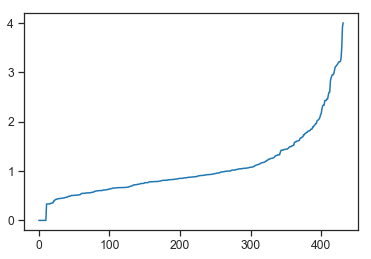

In [121]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(d_scaled)
distances, indices = nbrs.kneighbors(d_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [133]:
# to be completed
from sklearn.cluster import DBSCAN

db_clu = DBSCAN(eps=2, min_samples=9).fit(d_scaled)
clusters = db_clu.labels_
#d_scaled['db_scan'] = labels

#number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print('Estimated number of clusters:', n_clusters)
print('Estimated number of noise points:', n_noise)
df_enc.head(10)


Estimated number of clusters: 12
Estimated number of noise points: 138


,acousticness,age,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,home,other,outdoor,work,activity_other,amusing,commuting,studying,working,working out,female,male,afternoon,evening,midday,morning,night
0,0.1430,44,0.517,0.671,0.392000,0.0974,-10.072,19.0,0.0279,188.021,0.8620,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,0.4070,44,0.544,0.463,0.000000,0.0748,-6.832,43.0,0.0294,131.842,0.2820,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
2,0.6960,44,0.553,0.528,0.001080,0.1040,-12.852,33.0,0.0306,143.937,0.0952,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0.0863,44,0.649,0.716,0.000026,0.1350,-5.371,80.0,0.0349,99.988,0.1630,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0.0275,44,0.516,0.595,0.000000,0.1090,-4.630,78.0,0.0313,119.972,0.2220,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
5,0.1420,44,0.459,0.545,0.000000,0.1050,-4.874,60.0,0.0282,137.941,0.1940,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
6,0.1230,44,0.478,0.633,0.000000,0.4100,-6.190,67.0,0.0345,89.909,0.2870,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
7,0.0641,44,0.645,0.787,0.513000,0.3410,-4.707,54.0,0.0274,84.116,0.9060,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
8,0.1430,44,0.517,0.671,0.392000,0.0974,-10.072,19.0,0.0279,188.021,0.8620,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
9,0.2870,44,0.441,0.664,0.000010,0.1410,-8.958,31.0,0.0424,132.136,0.2010,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [55]:
set(labels)
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

#### Apply t-stochastic embeddings ####

In [143]:
x_embedded = TSNE(n_components=2, learning_rate=100).fit_transform(d_scaled)
print(x_embedded.shape)
df_plot = pd.DataFrame()
df_plot['dim_1']  = x_embedded[:,0]
df_plot['dim_2']  = x_embedded[:,1]
df_plot['Mood'] = Y
df_plot['clusters'] = clusters

(432, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


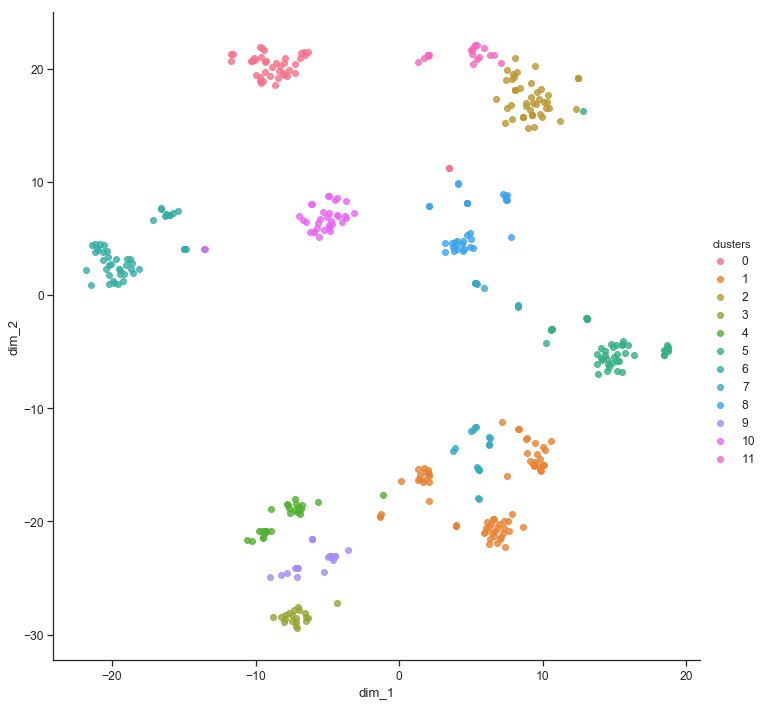

In [144]:
sns.set_context('notebook', font_scale = 1.1)
sns.set_style('ticks')

sns.lmplot(x='dim_1',
          y='dim_2',
          data = df_plot,
          fit_reg = False,
          legend = True,
          size = 10,
          hue = 'clusters' )

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


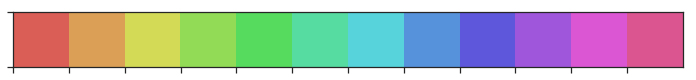

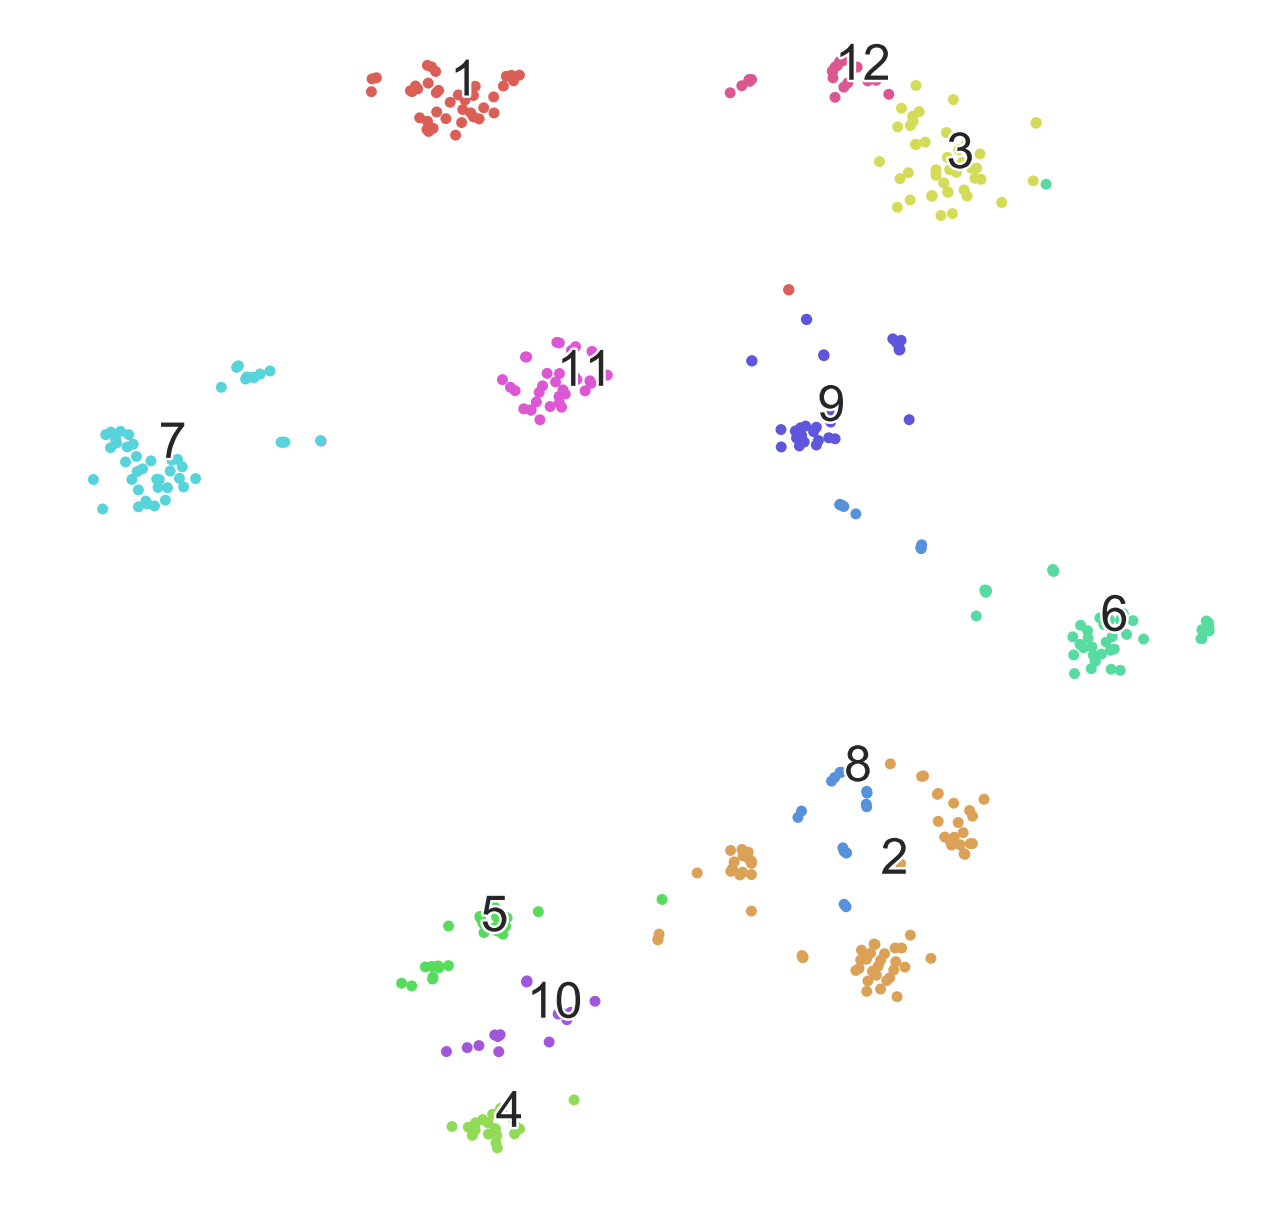

In [145]:
import matplotlib.patheffects as PathEffects

n_clusters=12
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    n_clusters=12
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", n_clusters))

    # We create a scatter plot.
    f = plt.figure(figsize=(22, 22))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(n_clusters):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i+1), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


print(list(range(1,n_clusters+1)))
sns.palplot(np.array(sns.color_palette("hls", n_clusters)))
scatter(x_embedded, clusters)
plt.savefig('digits_tsne-generated_18_cluster.png', dpi=120)

#### Predictions based on song metadata and user context ####

In [ ]:
#1.get user context (target is in what cluster it belongs)
#2.get spotify metadata
#3.